In [1]:
from InterOptimus.itworker import InterfaceWorker
from pymatgen.core.structure import Structure
from mp_api.client import MPRester

In [2]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

In [3]:
with MPRester('fFtrdShVJH4jwWHiId8v4cyGzV2oYnoG') as mpr:
        docs = mpr.materials.summary.search(
        material_ids = ["mp-1138", "mp-1222510"],
        fields=["material_id", "structure", "nelements"])
        for doc in docs:
            material_id = doc.material_id
            structure = doc.structure
    
            # 使用 SpacegroupAnalyzer 获取常规结构
            analyzer = SpacegroupAnalyzer(structure)
            doc.structure = analyzer.get_conventional_standard_structure()
film_conv, substrate_conv = docs[0].structure, docs[1].structure
iw = InterfaceWorker(film_conv, substrate_conv)

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
iw.lattice_matching(max_area = 27, max_length_tol = 0.03, max_angle_tol = 0.01,
                    film_max_miller = 3, substrate_max_miller = 3, film_millers = None, substrate_millers = None)
#Note max millers are in primitive cell, should be different from the indices in the polar projection below which are in conventional cell
#If you specify miller indices yourself, just ignore film_max_miller and substrate_max_miller


KeyboardInterrupt



In [ ]:
#Visualize matching information
iw.ems.plot_unique_matches() 

In [ ]:
iw.ems.plot_matching_data(['LiF', 'Li$_3$MnCoNiO$_6$'],'project.jpg', show_millers = True, show_legend = True)

In [ ]:
iw.parse_interface_structure_params(termination_ftol = 0.2, c_periodic = False, \
                                    vacuum_over_film = 12, film_thickness = 10, \
                                    substrate_thickness = 10, shift_to_bottom = True)

In [ ]:
iw.output_slabs(2,0)

In [ ]:
wf = iw.global_random_sampling(n_taget = 20, 
                               n_max = 1000, sampling_min_displace = 1, discut = 1,
                               to_fireworks = True,
                              project_name = 'NCM_LiF', 
                                db_file = '/public5/home/t6s001944/.conda/envs/general/lib/python3.12/site-packages/atomate/config/db.json',
                                vasp_cmd = 'mpirun -np 96 vasp_std',
                                user_incar_settings={'NCORE':12}, 
                               work_dir = '/public5/home/t6s001944/InterOptimusPaper/random_sampling/NCM_LiF/vasp')

In [20]:
import pickle
with open('wf.pkl','wb') as f:
    pickle.dump(wf.to_dict(), f)

In [19]:
from fireworks import Workflow

In [33]:
new_wf = Workflow([wf[550], wf[551]])

In [15]:
from fireworks import LaunchPad

In [17]:
lp = LaunchPad.auto_load()

In [18]:
lp.delete_fws

Help on method delete_fws in module fireworks.core.launchpad:

delete_fws(fw_ids, delete_launch_dirs=False) method of fireworks.core.launchpad.LaunchPad instance
    Delete a set of fireworks identified by their fw_ids.

    ATTENTION: This function serves maintenance purposes and will leave
    workflows untouched. Its use will thus result in a corrupted database.
    Use 'delete_wf' instead for consistently deleting workflows together
    with theit fireworks.

    Args:
        fw_ids ([int]): Firework ids
        delete_launch_dirs (bool): if True all the launch directories associated with
            the WF will be deleted as well, if possible.



In [34]:
import pickle
with open('new_wf.pkl','wb') as f:
    pickle.dump(new_wf.to_dict(), f)

In [19]:
len(wf)

3818

In [17]:
import pickle
with open('wf.pkl','wb') as f:
    pickle.dump(wf.to_dict(), f)

In [8]:
with open('wf.pkl','rb') as f:
    data = pickle.load(f)

In [9]:
from fireworks import Workflow

In [29]:
-3928/2

-1964.0

In [28]:
wf[0].spec

{'_launch_dir': '/public5/home/t6s001944/InterOptimusPaper/random_sampling/Ni3S2/vasp/fmsg_0_0',
 '_tasks': [{'vasp_input_set': {'@module': 'pymatgen.io.vasp.sets',
    '@class': 'MPStaticSet',
    '@version': None,
    'structure': {'@module': 'pymatgen.core.structure',
     '@class': 'Structure',
     'charge': 0,
     'lattice': {'matrix': [[4.030964441472857, 0.0, 2.4682538503632665e-16],
       [0.037841015579677804, 4.030786819711319, -6.482285218373636e-16],
       [0.0, 0.0, 34.03823429095444]],
      'pbc': [True, True, True],
      'a': 4.030964441472857,
      'b': 4.030964441472858,
      'c': 34.03823429095444,
      'alpha': 90.0,
      'beta': 90.0,
      'gamma': 89.462123180944,
      'volume': 553.0518127747102},
     'properties': {},
     'sites': [{'species': [{'element': 'Li', 'occu': 1}],
       'abc': [0.32553267895618854, 0.8255326789561886, 0.29152767929081347],
       'properties': {'bulk_equivalent': 0,
        'interface_label': 'film',
        'bulk_wyckof

In [45]:
import json

In [46]:
with open('global_random_sampling.json', 'r') as f:
    data = json.load(f)

In [50]:
from numpy import random

In [78]:
random.seed(4)
random.rand(40, 3)

array([[0.96702984, 0.54723225, 0.97268436],
       [0.71481599, 0.69772882, 0.2160895 ],
       [0.97627445, 0.00623026, 0.25298236],
       [0.43479153, 0.77938292, 0.19768507],
       [0.86299324, 0.98340068, 0.16384224],
       [0.59733394, 0.0089861 , 0.38657128],
       [0.04416006, 0.95665297, 0.43614665],
       [0.94897731, 0.78630599, 0.8662893 ],
       [0.17316542, 0.07494859, 0.60074272],
       [0.16797218, 0.73338017, 0.40844386],
       [0.52790882, 0.93757158, 0.52169612],
       [0.10819338, 0.15822341, 0.54520265],
       [0.52440408, 0.63761024, 0.40149544],
       [0.64980511, 0.3969    , 0.62391611],
       [0.76740497, 0.17897391, 0.37557577],
       [0.50253306, 0.68666708, 0.25367965],
       [0.55474086, 0.62493084, 0.89550117],
       [0.36285359, 0.63755707, 0.1914464 ],
       [0.49779411, 0.1824454 , 0.91838304],
       [0.43182207, 0.8301881 , 0.4167763 ],
       [0.90466759, 0.40482522, 0.3311745 ],
       [0.57213877, 0.84544365, 0.86101431],
       [0.

In [76]:
import matplotlib.pyplot as plt

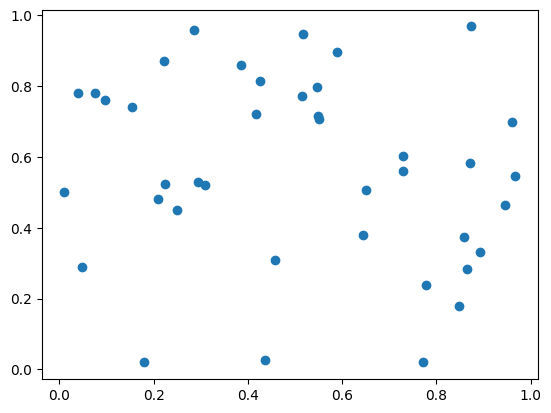

In [77]:
plt.scatter(xs, ys)

In [42]:
def readDBvasp(db, field):
    data = db.collection.find_one(field)
    energy = 0
    if data != None:
        if data['state'] == 'successful':
            energy = data['output']['energy']
    return energy

In [ ]:
def read_global_random_sampling(project_name):
    with open('global_random_sampling.json', 'r') as f:
        input_data = json.load(f)
    tuple_keys = []
    output_data = {}
    for i in data.keys():
        kl = i.split('_')
        tuple_keys.append((int(kl[0]), int(kl[1])))
    
    for key in tuple_keys:
        i, j = key
        output_data[(i,j)] = input_data[f'{i}_{j}']
        output_data[(i,j)]
        for k in range(len(data[f'{i}_{j}']['xyzs']):
            